J41112 Шваб Кирилл
# <center>Лабораторная работа 2</center>
<center>Вариант 15</center>

## Задание 1

Пусть акция стоит 1000\$. На рынке можно купить европейский Call опцион со Strike price
X = 970\$ по цене 50\$  с погашением через T = 1 год. У Васи, Пети и Коли есть вера и 1000\$ у
каждого, они хотят вложиться в эти акции. Посчитайте результаты их инвестиций (абсолютные
и в процентах), если Вася купит только один опцион, Петя - одну акцию, Коля - опционы на
все деньги, и цена акции через год будет

- 900\$  
- 940\$
- 1000\$
- 1050\$
- 1100\$

1. Для расчета финансового результата <strong>Васи</strong> необходимо воспользоваться следующей формулой:
$$max(S-X, 0)- 50\$ $$ 

2. Для расчета финансового результата для <strong>Пети</strong> необходимо воспользоваться следующей формулой: 
$$S_1-S_0$$ 


3. Для расчета финансового результата для <strong>Коли</strong> (20 опционов по 50\$ за каждый) необходимо воспользоваться следующей формулой: 
 $$max(S - X , 0)\cdot20-20\cdot50\$ $$ 
 

In [57]:
import pandas as pd
import numpy as np


def vasya_result(x, s, euro_call):
    return max(s-x, 0) - euro_call


def petya_result(s1, money):
    return s1 - money


def kolya_result(x, s, euro_call, money):
    return (money/euro_call) * (max(s - x, 0) - euro_call)


def exercise_1() -> pd.DataFrame:
    """Задание 1. Инвестиции"""
    money = 1000  # цена акции
    strike_price = 970  # цена экспирации
    euro_call = 50  # цена за опцион
    spot_prices = np.array([900, 940, 1000, 1050, 1100]
                           )  # цены акций через год

    # значения для Васи
    vasya = np.array([vasya_result(strike_price, s, euro_call)
                     for s in spot_prices])
    # значения для Пети
    petya = np.array([petya_result(s1, money) for s1 in spot_prices])
    # значения для Коли
    kolya = np.array([kolya_result(strike_price, s, euro_call, money)
                     for s in spot_prices])

    # Совместные результаты
    result_absolute = vasya + petya + kolya
    result_relative = np.round(100 * result_absolute / (3 * money), 2)

    book = {'Цена акции': spot_prices,
            'Вася': vasya,
            'Петя': petya,
            'Коля': kolya,
            'Совместный абсолютный результат': result_absolute,
            'Совместный относительный результат, %': result_relative}
    return pd.DataFrame(book)


exercise_1()


,Цена акции,Вася,Петя,Коля,Совместный абсолютный результат,"Совместный относительный результат, %"
0,900,-50,-100,-1000.0,-1150.0,-38.33
1,940,-50,-60,-1000.0,-1110.0,-37.00
2,1000,-20,0,-400.0,-420.0,-14.00
3,1050,30,50,600.0,680.0,22.67
4,1100,80,100,1600.0,1780.0,59.33


## Задание 2
Пусть цена европейского Put опциона с X = 500\$ равна 3\$, а текущая цена акции pавна
S = 502\$. Найдите цену европейского Call опциона с тем же страйком, если $r = 5%$ и $T −t = 1$.
Ответ округлите до целых.

Цены Европейских Put и Call опционов с одинаковыми параметрами связаны формулой: $$C-P=S(t)-Xe^{-r(T-t)}$$
$$C = P + S(t)-Xe^{-r(T-t)}$$

In [58]:
from math import exp


def exercise_2():
    """Задание 2. Найти Put опцион из уравнения"""
    x = 500  # страйк цена
    r = 5  # ,безрисковая процентная ставка?
    dt = 1  # время для исполнения
    s_t = 502  # форвардная или не форвардная цена ?
    put = 3  # цена за пут опцион
    euro_call = put + s_t - x * exp(-(r/100)*dt)
    return round(euro_call)


print(f'Цена Европейского Put опциона = {exercise_2()}$')


Цена Европейского Put опциона = 29$


## Задание 3



#### a) Для Европейских опционов построить графики зависимостей:
 - Цен и payoff-ов от цены базового актива
 - $∆$,$Γ$, $Θ$, $Vega$, $ρ$ от цены базового актива
 - <strong>Put-Call parity</strong>


#### b) Пронаблюдать зависимость цены Европейского опциона от $T-t$, $r$ от $σ$ , сравнить с Греками.

### A) Для европейских опционов построим цены опционов и payoff от цен 

#### Для Call и Put опционов формулы cоответственно:
$$
C(S, t) = N(d_1)S - N(d_2)Ke^{-r(T-t)}
$$

$$
P(S, t) = N(-d_2)Xe^{-r(T-t)} - N(-d_1)S
$$

$$
d_1 = \frac{1}{\sigma\sqrt{T-t}}\Bigl[ln\Bigl(\frac{S_t}{k}\Bigr) + \Bigl(r + \frac{\sigma^2}{2}\Bigr)(T-t)\Bigr]  $$
$$d_2 = d_1 - \sigma\sqrt{T-t}$$

- $S$ - текущая цена базисной акции
- $N(x)$ - 
- $K$ - цена исполнения опциона
- $r$ - безрисковая процентная ставка
- $T - t$ - время до истечения опциона
- $\sigma$ - волатильность 

In [59]:
import math
from scipy import stats
import matplotlib.pyplot as plt

STRIKE_PRICE = 100
RANGE_VALUE = 10
R = 0.004
SIGMA = 0.03
T = 4
D = 1
N = stats.norm.cdf 
N_ = stats.norm.pdf


Распишем функции для Fair Value и Payoff

In [60]:
# Расчет pay-off для call
def payoff_call(s, x=STRIKE_PRICE):
    return max(s - x, 0)

# Расчет pay-off для put
def payoff_put(s, x=STRIKE_PRICE):
    return max(x - s, 0)

# Расчет цены для call опциона
def fair_value_call(s, r=R, x=STRIKE_PRICE, t=T,sigma = SIGMA):
    return N(d1(s, t=t, r=r, x=x,sigma = sigma))*s \
        - N(d2(s, r=r, x=x, t=t, sigma=sigma)) * x * exp(-r * t)

# Расчет цены для put опциона
def fair_value_put(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return N(-d2(s, r=r, x=x, t=t, sigma=sigma))*x\
        * exp(-r * t) - N(-d1(s, t=t, r=r, x=x,sigma = sigma))*s


def d1(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return (math.log(s/x) + (r + (sigma**2)/2) * t)/(sigma * math.sqrt(t))


def d2(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return d1(s, r=r, x=x, t=t, sigma=sigma) - sigma * math.sqrt(t)

Запишем значения Fair Value и Payoff в списки

In [61]:
# Интервал изменения цены
interval = np.linspace(STRIKE_PRICE-RANGE_VALUE,
                       STRIKE_PRICE+RANGE_VALUE, num=1000)
# Payoff
payoff_call_arr = np.array([payoff_call(s) for s in interval])
payoff_put_arr = np.array([payoff_put(s) for s in interval])
# Fair values
fair_value_put_arr = np.array([fair_value_put(s) for s in interval])
fair_value_call_arr = np.array([fair_value_call(s) for s in interval])


Отобразим на графиках Fair Value и Payoff

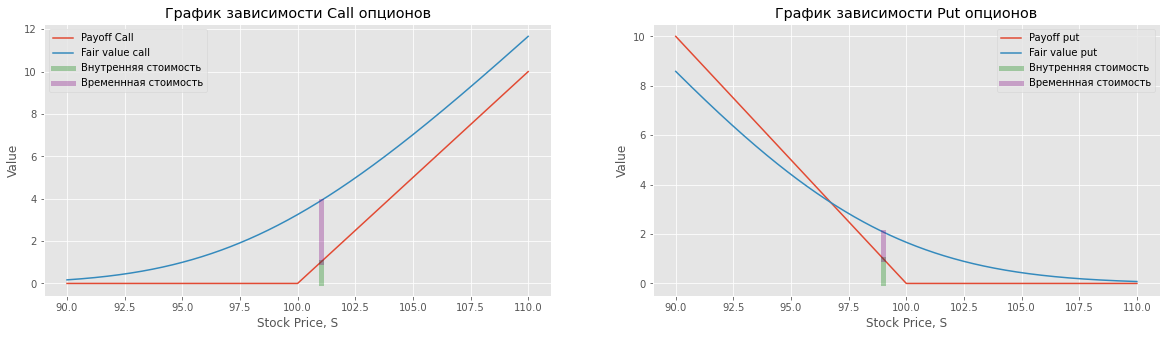

In [62]:
def draw_graphics():
    global interval
    plt.figure(figsize=(20, 5))
    plt.style.use('ggplot')
    # Call
    plt.subplot(1, 2, 1)
    plt.title('График зависимости Call опционов')
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    plt.plot(interval, fair_value_call_arr, label='Fair value call')
    plt.xlabel('Stock Price, S')
    plt.ylabel('Value')
    plt.legend(loc='best')
    # временная и внутреняя стоимость
    point = STRIKE_PRICE + 0.1 * RANGE_VALUE
    plt.plot([point, point], [0, payoff_call(point)],
             linewidth=5, color='green', alpha=0.3, label='Внутренняя стоимость')
    plt.plot([point, point], [payoff_call(point), fair_value_call(point)],
             linewidth=5, color='purple', alpha=0.3, label='Временнная стоимость')
    plt.legend(loc='best')
    # Put
    plt.subplot(1, 2, 2)
    plt.title('График зависимости Put опционов')
    plt.plot(interval, payoff_put_arr, label='Payoff put')
    plt.plot(interval, fair_value_put_arr, label='Fair value put')
    plt.xlabel('Stock Price, S')
    plt.ylabel('Value')
    plt.legend(loc='best')
    # временная и внутреняя стоимость
    point = STRIKE_PRICE - 0.1 * RANGE_VALUE
    plt.plot([point, point], [0, payoff_put(point)],
             linewidth=5, color='green', alpha=0.3, label='Внутренняя стоимость')
    plt.plot([point, point], [payoff_put(point), fair_value_put(point)],
             linewidth=5, color='purple', alpha=0.3, label='Временнная стоимость')
    plt.legend(loc='best')


draw_graphics()


Исследуем опцион Call на $\sigma$

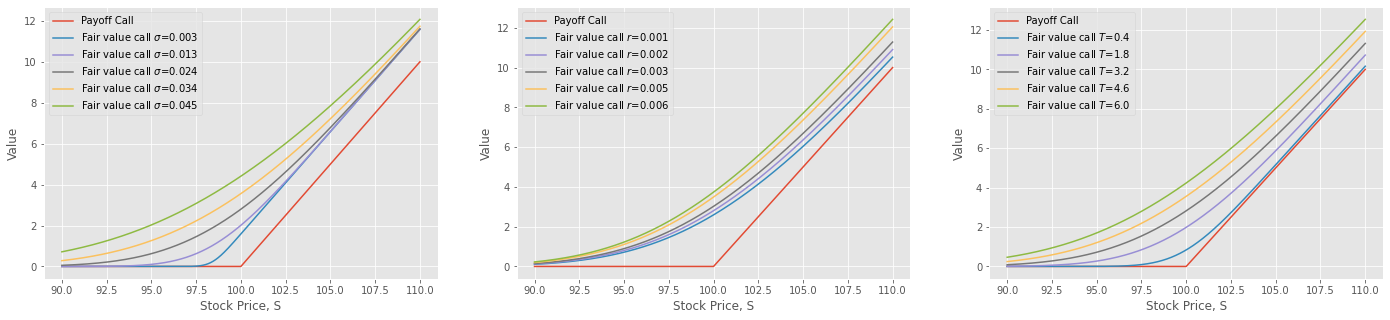

In [63]:
def research_fairvalue_show():
    """Изменение функций в зависимости от параметров"""
    # укажем интервалы для изменения параметров
    sigma = np.round(np.linspace(SIGMA*0.1, SIGMA*1.5, num=5), 3)
    r = np.round(np.linspace(R*0.2, R*1.5, num=5), 3)
    t = np.round(np.linspace(T*0.1, T*1.5, num=5), 3)
    # Изменение от sigma
    plt.figure(figsize=(24, 5))
    plt.subplot(1, 3, 1)
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    for i in sigma:
        fair_call_arr = [fair_value_call(s, sigma=i) for s in interval]
        plt.plot(interval, fair_call_arr,
                 label=f'Fair value call $\sigma$={i}')
    plt.xlabel('Stock Price, S')
    plt.ylabel('Value')
    plt.legend(loc='best')
    # Изменение от r
    plt.subplot(1, 3, 2)
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    for i in r:
        fair_call_arr = [fair_value_call(s, r=i) for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair value call $r$={i}')
    plt.xlabel('Stock Price, S')
    plt.ylabel('Value')
    plt.legend(loc='best')
    # Изменение от T
    plt.subplot(1, 3, 3)
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    for i in t:
        fair_call_arr = [fair_value_call(s, t=i) for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair value call $T$={i}')
    plt.xlabel('Stock Price, S')
    plt.ylabel('Value')
    
    plt.legend(loc='best')


research_fairvalue_show()


### Построение греков


Дельта — показывает, насколько изменится премия при увеличении цены базового актива на один пункт. Для опциона колл Дельта будет положительной, а для пута — отрицательной.

Гамма — показывает, насколько изменится Дельта при увеличении цены базового актива на один пункт. Используется для определения изменчивости Дельты.

Вега — показывает, насколько изменится премия при увеличении вмененной волатильности на один пункт. Другими словами, значение Веги отражает, насколько более ценным будет опцион при росте волатильности.

Тета — показывает, насколько изменится премия при увеличении срока до экспирации на один день. Соответственно, отрицательное значение Теты будет показывать, насколько изменится премия при уменьшении времени до экспирации на один день.

Ро — показывает, насколько изменится премия при увеличении безрисковой процентной ставки на один пункт. Как правило, редко используется вследствие слабого влияния на размер премии.



Напишем функции для вычисления <strong>Greek</strong>

In [64]:
# Дельта для call и put на выбор
def delta(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA, mode='call'):
    """Delta"""
    if mode == 'call':
        return exp(-D*t) * N(d1(s, r=r, x=x, t=t, sigma=sigma))
    elif mode == 'put':
        return math.exp(-D*t) * (N(d1(s, r=r, x=x, t=t, sigma=sigma)) - 1)

# Гамма
def gamma(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA,):
    """Gamma"""
    return (math.exp(-D*t)*N_(d1(s, r=r, x=x, t=t, sigma=sigma)))/(sigma*s*math.sqrt(t))

# Тета для call и put на выбор
def tetha(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA, mode='call'):
    """Tetha"""
    if mode == 'call':
        a = -(sigma*s*exp(-D*t)*N_(d1(s, r=r, x=x, t=t, sigma=sigma)))/(2*math.sqrt(t))
        b = (D*s*N(d1(s, r=r, x=x, t=t, sigma=sigma))*exp(-D*t))
        c = -(r*x*exp(-r*t)*N(d2(s, r=r, x=x, t=t, sigma=sigma)))
        return a + b + c
    elif mode == 'put':
        a = -(sigma*s*exp(-D*t)*N_(-d1(s, r=r, x=x, t=T, sigma=sigma)))/(2*math.sqrt(t))
        b = -(D*s*N(-d1(s, r=r, x=x, t=t, sigma=sigma))*exp(-D*t))
        c = (r*x*math.exp(-r*t)*N(-d2(s, r=r, x=x, t=t, sigma=sigma)))
        return a + b + c
        

# Vega для call и put на выбор
def vega(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    """Vega"""
    return s*math.sqrt(t)*math.exp(-D*t)*N(d1(s, r=r, x=x, t=t, sigma=sigma))

# Ро для call и put на выбор
def rho(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA, mode='call'):
    """Rho"""
    if mode == 'call':
        return x*t*math.exp(-r*t)*N(d2(s, r=r, x=x, t=t, sigma=sigma))
    elif mode == 'put':
        return -x*t*math.exp(-r*t)*N(-d2(s, r=r, x=x, t=t, sigma=sigma))


Отобразим греки на графиках

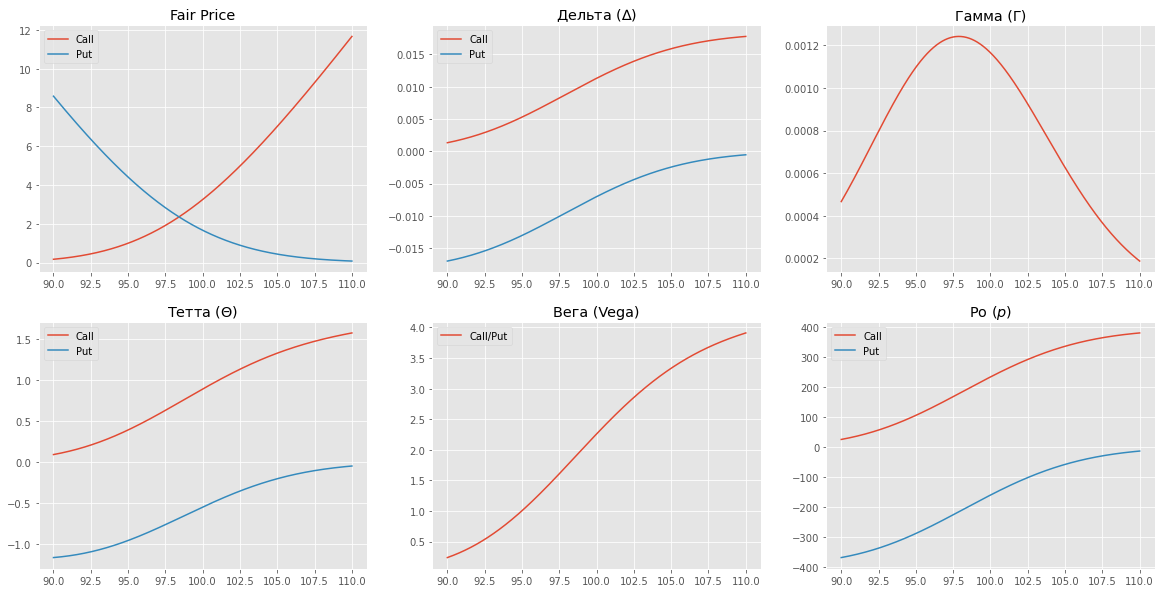

In [65]:
def draw_greeks():
    """Создание списков значений греков"""
    # Дельта
    delta_call_arr = [delta(s, mode='call') for s in interval]
    delta_put_arr = [delta(s, mode='put') for s in interval]

    # Гамма
    gamma_arr = [gamma(s) for s in interval]

    # Вега
    vega_arr = [vega(s) for s in interval]

    # Тетта
    tetha_call_arr = [tetha(s, mode='call') for s in interval]
    tetha_put_arr = [tetha(s, mode='put') for s in interval]

    # Ро
    ro_call_arr = [rho(s, mode='call') for s in interval]
    ro_put_arr = [rho(s, mode='put') for s in interval]
    # Отображение греков на графике
    plt.figure(figsize=(20, 10))
    # Fair Price
    plt.subplot(2, 3, 1)
    plt.plot(interval, fair_value_call_arr, label='Call')
    plt.plot(interval, fair_value_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Fair Price')
    # Дельта
    plt.subplot(2, 3, 2)
    plt.plot(interval, delta_call_arr, label='Call')
    plt.plot(interval, delta_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Дельта ($∆$)')
    # Дельта
    plt.subplot(2, 3, 3)
    plt.plot(interval, gamma_arr)
    plt.title('Гамма (Γ)')
    # Тетта
    plt.subplot(2, 3, 4)
    plt.plot(interval, tetha_call_arr, label='Call')
    plt.plot(interval, tetha_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Тетта ($Θ$)')
    # Вега
    plt.subplot(2, 3, 5)
    plt.plot(interval, vega_arr, label='Сall/Put')
    plt.legend(loc='best')
    plt.title('Вега (Vega)')
    # Ро
    plt.subplot(2, 3, 6)
    plt.plot(interval, ro_call_arr, label='Call')
    plt.plot(interval, ro_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Ро ($p$)')


draw_greeks()


<p>Греки - это коэффициенты, которые учитвают параметры опционных сделок.
Они позволяют оценивать как отдельные опционы, так и конструкции из опционов
Общий вывод по графикам:</p>

## ДЕЛЬТА

 для опциона call значения delta меняются от 0 до 1
для опциона put значения delta меняются от -1 до 0
иногда delta рассчитывается в процентах. Определяет стоимость и направление.
- 0.2 - опицон вне деньгах
- 0.5 - опцион около денег
- 1.0 - опцион в деньгах

<b>Показатель опционной стратегии</b>

Дельта опционной конструкции составляет сумму всех показателей Delta для каждого договора, который входит в эту комбинацию.

В качестве примера: для осуществления синтетического фьючерса необходимо приобрести колл и продать пут. Если колл равен 0,6, а пут - -0,4, то Дельта всей стратегии составит 0,6 - (-0,4) = 1.

 

<b>Факторы, влияющие на значение показателя</b>

На величину Дельты влияют следующие факторы:

- Стоимость базового актива. При его росте возрастает и величина показателя. При падении, соответственно, - уменьшается.
- Срок истечения сделки. В этом случае, чем больше остается времени до погашения опциона “без денег”, тем выше значение Дельты. В случае опционов “в деньгах” - наоборот.
- Волатильность. Чем выше уровень разницы стоимости договора, тем больше Дельта “без денег” и тем меньше Дельта “в деньгах”.




## ВЕГА

Вега коэффициент, отражающий количество пунктов, на которое изменится опционная премия (или цена опциона) при измении волатильности на 1%. Например, если бы мы рассматривали конструкцию стреддл, то кооэффицент веги позволит понять насколько прибыльная конструкция

<b>Значения показателя на разных опционах</b>

Величина Веги различных опционов:

- Наибольшую величину имеет показатель опционов “около денег”.
- Наименьшую величину имеет показатель опционов “без денег”.
- Чем больше остается времени до закрытия сделки, тем больше будет Вега.
 

<b>Показатель опционной стратегии</b>

Для того чтобы определить Вегу целой стратегии, необходимо суммировать все показатели длинных сделок и вычесть - коротких.

Факторы, влияющие на значение показателя на значение Дельты влияют следующие факторы:

- Время погашения сделки. При приближении к дате закрытия срочных договоров, значение показателя Вега уменьшается.
- Волатильность.
- Изменение стоимости БА. Чем выше стоимость базового актива, тем больше значение показателя Вега.
№ ==========
## ГАММА
 Гамма - коэффициент, показывающий скорость изменения дельты (ускорение стоимости), т.е. отражает то, насколько быстро или медленно меняется опционная премия. 

 В качестве примера: если Гамма сделки составит 0,1, а Дельта - 0,5, то в случае роста базового актива на 1 пункт, значение Дельты вырастет до 0,6. В случае уменьшения стоимости базового актива на 1 пункт, наоборот, упадет до 0,4.


<b>Значения показателя на разных опционах</b>

Значения Гаммы различных опционов:

- Наибольшая величина показателя наблюдается у опционов “около денег”. При любом отклонении в сторону “в деньгах” или “без денег”, Гамма уменьшается.
- Величина показателя Гамма тем выше, тем ближе дата завершения сделки.
 

<b>Показатель опционной стратегии</b>

Для того чтобы определить величину показателя Гамма у целой конструкции опционов, необходимо суммировать показатели длинных сделок и вычесть показатели коротких сделок. Но при этом нужно учитывать то, что величина Гаммы будет меняться вместе со стоимостью базового актива.

 

<b>Факторы, влияющие на значение показателя</b>

На значение Гаммы оказывают влияние следующие факторы:

- Чем ближе дата закрытия опционной сделки “около денег”, тем выше значение Гамма. У опциона “без денег” значение показателя сначала растет, а при приближении к сроку погашения - уменьшается.
- Волантильность. Чем выше ее уровень, тем ниже величина Гаммы.
- Стоимость базового актива. Цена БА склоняет опцион “около денег” к “без денег” и “в деньгах”, тем самым оказывая влияние и на величину Гамма.
## ТЕТТА
Тета — показывает, насколько изменится премия при увеличении срока до экспирации на один день. Соответственно, отрицательное значение Теты будет показывать, насколько изменится премия при уменьшении времени до экспирации на один день.


Стоимость опционной сделки прямо зависит от времени до погашения. Чем меньше срок, тем меньше цена.
Тета так же выражается в пунктах. Например, если значение показателя равно 0,05, можно сделать выводы, что стоимость опциона ежедневно уменьшается на 0,05 единиц. Несмотря на то, что Тета - это всегда положительная величина, ее могут указывать и с отрицательным значением.

 

<b>Значения показателя на разных опционах</b>

Значения Теты различных опционов:

- Тета опционной сделки “около денег” всегда будет выше, чем Тета опционной сделки “без денег”.
- Чем больше времени до момента закрытия сделки, тем меньше величина показателя Тета.
 

<b>Показатель опционной стратегии</b>

Для того чтобы определить значение показателя целой конструкции сделок, необходимо сложить все Теты.

 

<b>Факторы, влияющие на значение показателя</b>

На значение Теты влияют следующие факторы:

- Срок закрытия сделки. Чем ближе этот момент, тем больше будет значение показателя. Однако при самом приближении к дате завершения опциона, показатель Тета увеличивается, поскольку стоимость сделки падает.
- Волатильность. Чем она выше, тем больше значение показателя.
- Стоимость базового актива.
## РО
Ро — показывает, насколько изменится премия при увеличении безрисковой процентной ставки на один пункт. Как правило, редко используется вследствие слабого влияния на размер премии. 

Процентная ставка по-разному влияет на разные опционы: при ее росте увеличивается стоимость опционов Кол и падает стоимость опционов Пут. При снижении процентной ставки, наоборот, Колы дешевеют, а Путы дорожают.

У опционов Кол Ро имеет всегда положительное значение, у опционов Пут - отрицательное. Ро минимально для опционов глубоко «вне денег» и максимально – для опционов глубоко «в деньгах». Более высокое значение Ро имеют долгосрочные опционы, в то время как у краткосрочных опционов Ро приближается к нулю.

<u>Построение Put Call Parity</u>

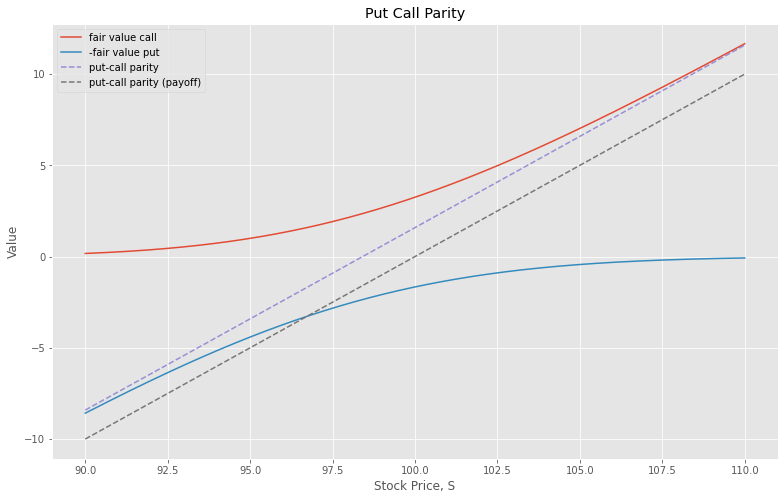

In [66]:
plt.figure(figsize=(13, 8))
plt.title('Put Call Parity')
# fair put
plt.plot(interval, fair_value_call_arr, label='fair value call')
# fair call
plt.plot(interval, -fair_value_put_arr, label='-fair value put')
# put call
plt.plot(interval, interval-STRIKE_PRICE*np.exp((-R)*T),
         label='put-call parity', linestyle='dashed')

plt.plot(interval, payoff_call_arr - payoff_put_arr,
         label='put-call parity (payoff)', linestyle='dashed')
plt.xlabel('Stock Price, S')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

уравнение паритета показывает взаимосвязь между премиями опционов по одному и тому же базисному активу с одинаковыми датами истечения, что исключает возможность арбитража. Иметь базовую акцию и купить опцион пут обеспечит такую же прибыль, как покупка колл и инвестирование величины Е под безрисковую ставку 

### б) Пронаблюдать зависимость цены Европейского опциона от $T-t$, $r$ от $σ$ , сравнить с Греками.

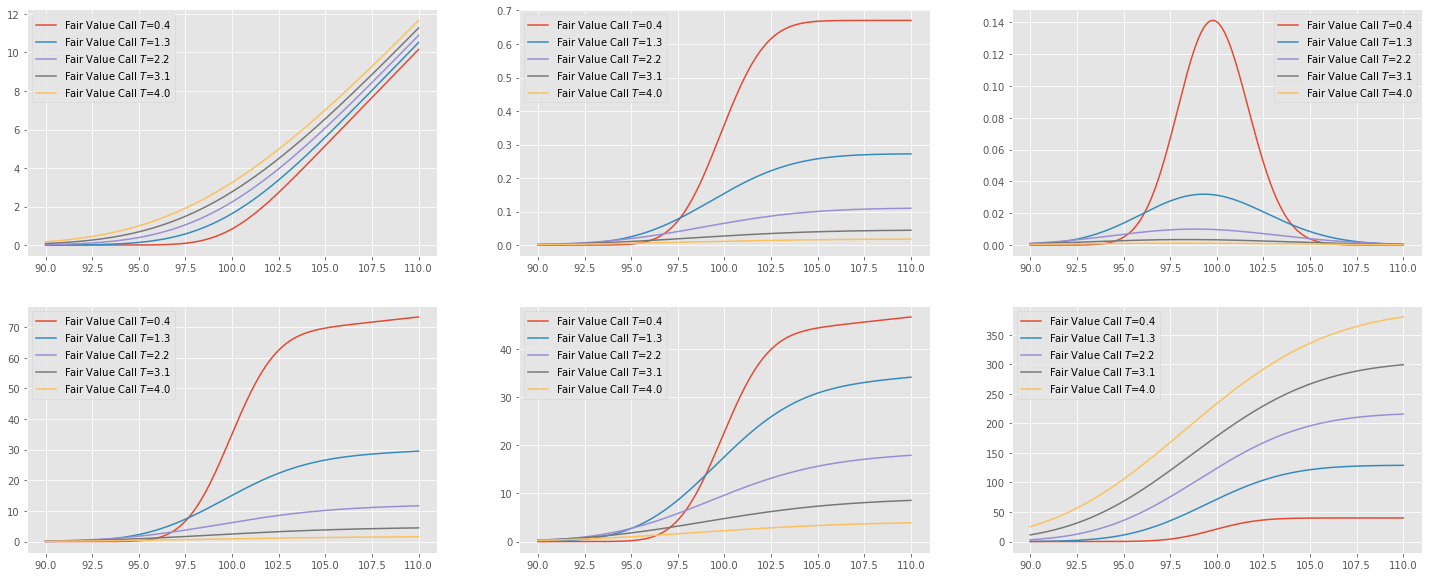

In [67]:
def research_parametr_t():
    """Построение 6 графиков с изменяющимся параметром t"""
    plt.figure(figsize=(25, 10))

    t = np.linspace(T*0.1,T,num=5)
    c = 1
    plt.subplot(2,3,1)
    for i in t:
        fair_call_arr = [fair_value_call(s,t=i)  for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair Value Call $T$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,2)
    for i in t:
        delta_arr = [delta(s,t=i)  for s in interval]
        plt.plot(interval, delta_arr, label=f'Fair Value Call $T$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,3)
    for i in t:
        gamma_arr = [gamma(s,t=i)  for s in interval]
        plt.plot(interval, gamma_arr, label=f'Fair Value Call $T$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,4)
    for i in t:
        theta_arr = [tetha(s,t=i)  for s in interval]
        plt.plot(interval, theta_arr, label=f'Fair Value Call $T$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,5)
    for i in t:
        vega_arr = [vega(s,t=i)  for s in interval]
        plt.plot(interval, vega_arr, label=f'Fair Value Call $T$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,6)
    for i in t:
        rho_arr = [rho(s,t=i)  for s in interval]
        plt.plot(interval, rho_arr, label=f'Fair Value Call $T$={i}')
    plt.legend(loc='best')
research_parametr_t()

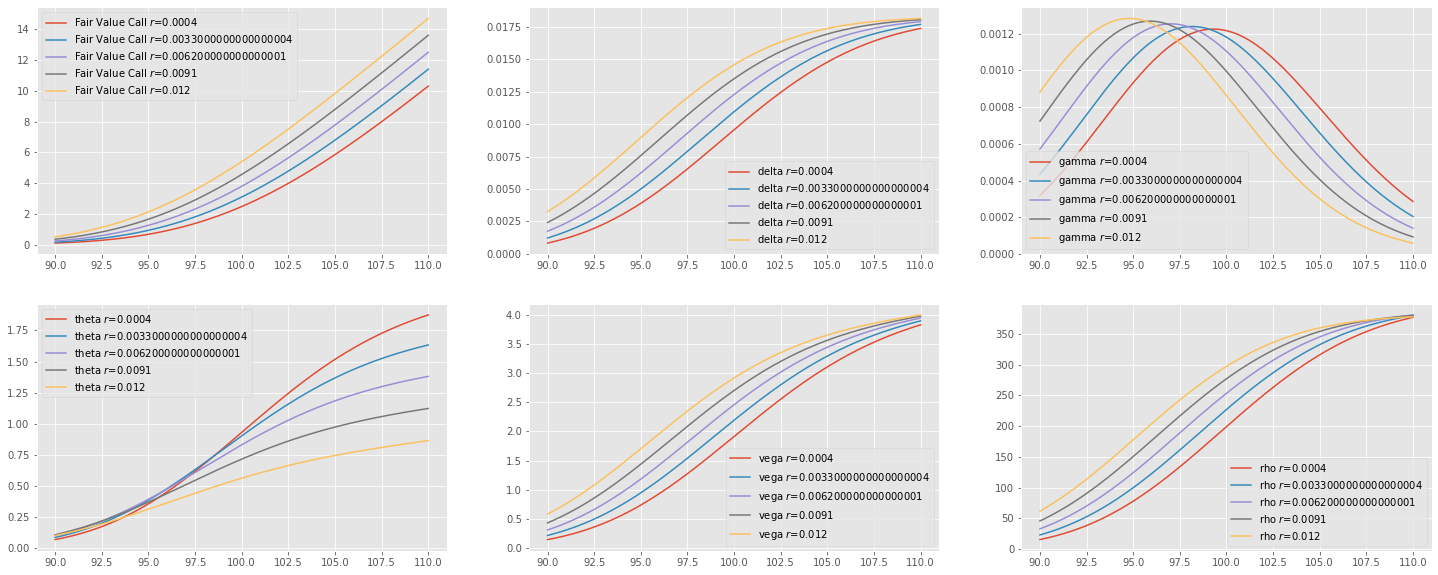

In [68]:
# Принимаем функцию greek и сторим графики чувствительности
# к изменениям процента, волатильности, времени 
def research_parametr_r():
    """Построение 6 графиков с изменяющимся параметром r"""
    plt.figure(figsize=(25, 10))

    r = np.linspace(R*0.1,R*3,num=5)
    c = 1
    plt.subplot(2,3,1)
    for i in r:
        fair_call_arr = [fair_value_call(s,r=i)  for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair Value Call $r$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,2)
    for i in r:
        delta_arr = [delta(s,r=i)  for s in interval]
        plt.plot(interval, delta_arr, label=f'delta $r$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,3)
    for i in r:
        gamma_arr = [gamma(s,r=i)  for s in interval]
        plt.plot(interval, gamma_arr, label=f'gamma $r$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,4)
    for i in r:
        theta_arr = [tetha(s,r=i)  for s in interval]
        plt.plot(interval, theta_arr, label=f'theta $r$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,5)
    for i in r:
        vega_arr = [vega(s,r=i)  for s in interval]
        plt.plot(interval, vega_arr, label=f'vega $r$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,6)
    for i in r:
        rho_arr = [rho(s,r=i)  for s in interval]
        plt.plot(interval, rho_arr, label=f'rho $r$={i}')
    plt.legend(loc='best')
research_parametr_r()

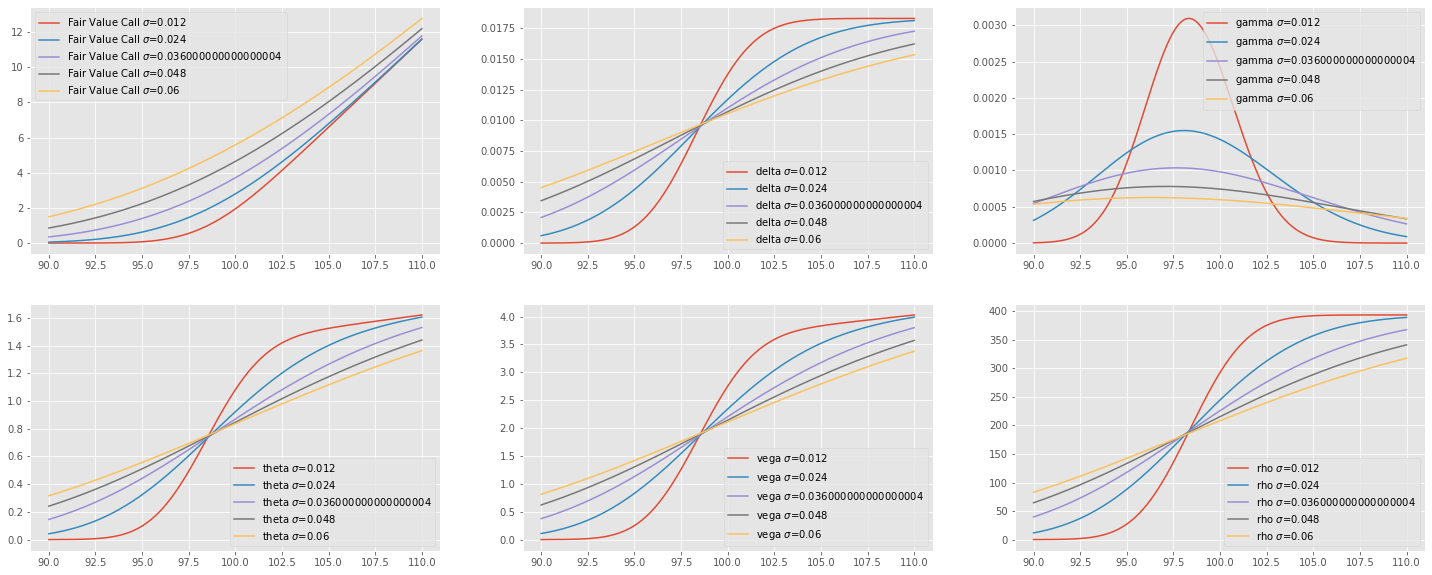

In [69]:
# Принимаем функцию greek и сторим графики чувствительности
# к изменениям процента, волатильности, времени 
def research_parametr_sigma():
    """Построение 6 графиков с изменяющимся параметром sigma"""
    
    plt.figure(figsize=(25, 10))
    plt.title('Графики зависимости от параметра $\sigma$')
    sigma = np.linspace(SIGMA*0.4,SIGMA*2,num=5)
    
    plt.subplot(2,3,1)
    for i in sigma:
        fair_call_arr = [fair_value_call(s,sigma=i)  for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair Value Call $\sigma$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,2)
    for i in sigma:
        delta_arr = [delta(s,sigma=i)  for s in interval]
        plt.plot(interval, delta_arr, label=f'delta $\sigma$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,3)
    for i in sigma:
        gamma_arr = [gamma(s,sigma=i)  for s in interval]
        plt.plot(interval, gamma_arr, label=f'gamma $\sigma$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,4)
    for i in sigma:
        theta_arr = [tetha(s,sigma=i)  for s in interval]
        plt.plot(interval, theta_arr, label=f'theta $\sigma$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,5)
    for i in sigma:
        vega_arr = [vega(s,sigma=i)  for s in interval]
        plt.plot(interval, vega_arr, label=f'vega $\sigma$={i}')
    plt.legend(loc='best')
    plt.subplot(2,3,6)
    for i in sigma:
        rho_arr = [rho(s,sigma=i)  for s in interval]
        plt.plot(interval, rho_arr, label=f'rho $\sigma$={i}')
    plt.legend(loc='best')
research_parametr_sigma()